## 图像编码
### 位平面编码
#### 位平面分解
以8比特图像为例，可以分成8个图片

In [60]:
# author： Zhijie Tan
from PIL import Image
from pylab import *
from matplotlib.font_manager import FontProperties
import numpy as np
import sys
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif']=['Consolas-with-Yahei']

In [61]:
Im = Image.open('cameraman.tif')
Im = np.array(Im)
I8bit = np.zeros((np.shape(Im)[0],np.shape(Im)[1],8))
I8bit[:,:,0] = Im>2**7
Im0 = Im
for i in range(7):
        Im0 = Im0 - I8bit[:,:,i]*2**(7-i)
        I8bit[:,:,i+1] = (Im0)>=2**(6-i)

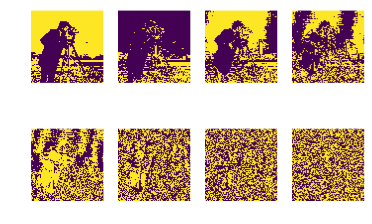

In [62]:
figure()
subplot(241)
imshow(I8bit[:,:,0])
axis("off")
subplot(242)
imshow(I8bit[:,:,1])
axis("off")
subplot(243)
imshow(I8bit[:,:,2])
axis("off")
subplot(244)
imshow(I8bit[:,:,3])
axis("off")
subplot(245)
imshow(I8bit[:,:,4])
axis("off")
subplot(246)
imshow(I8bit[:,:,5])
axis("off")
subplot(247)
imshow(I8bit[:,:,6])
axis("off")
subplot(248)
imshow(I8bit[:,:,7])
axis("off")
show()

#### 游程编码

In [66]:
lineDiff =  np.zeros(np.shape(I8bit))
code = []
for k in range(I8bit.shape[2]): # k 表示比特位
    for l in range(I8bit.shape[0]): # l表示行数
        lineDiff[l,:-1,k] = np.diff(I8bit[l,:,k]) 
        placeM1 = np.array(np.where(lineDiff[l,:,k]==-1)) # -1的位置
        placeP1 = np.array(np.where(lineDiff[l,:,k]==1)) # 1的位置
        place = np.hstack((placeM1,placeP1))
#         place = np.hstack([placeM1,placeP1],[-1,I8bit.shape[1]-1])
        place = np.append(place,[-1,I8bit.shape[1]-1])
        place = np.sort(place)
        number = np.diff(place)
        if any(placeM1)==False:
            if I8bit[l,0,k] == 1:
                code.append(['1'])
            else:
                code.append(['0'])
        else:
            if placeM1[0][0]>placeP1[0][0]:
                code.append(['0'])
            else:
                code.append(['1'])
        code[k*I8bit.shape[0]+l].append(number)
print('压缩前大小：',sys.getsizeof(Im),'压缩后大小：',sys.getsizeof(code))


压缩前大小： 65648 压缩后大小： 16560


##### 写在最后
最后得到的code就是编码之后的结果，至于重构，就先不放上来了